## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import random
import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt

from scipy import stats

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%config Inlinebackend.figure_format='svg'#vector setting

In [2]:
matplotlib.rcParams.update({'font.size': 10})  # размер шрифта на графиках

In [3]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

## Importing Data

In [4]:
TEST_DATASET_PATH = './data/project_task/test.csv'
print("TEST LOADING COMPLETE")

TEST LOADING COMPLETE


In [5]:
TRAIN_DATASET_PATH = './data/project_task/train.csv' # y_train, y_valid
print("TRAIN LOADING COMPLETE")

TRAIN LOADING COMPLETE


In [6]:
## check first and last 5 records of Train
## обучающий набор данных

train_df = pd.read_csv(TRAIN_DATASET_PATH, sep=',')
train_df.head(5).append(train_df.tail(5))

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B,119367.455796
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.148807
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B,171842.411855
9999,7202,94,1.0,35.815476,22.301367,6.0,9,9.0,1975,0.127376,B,B,43,8429,3,NaN,3,9,B,177685.627486


In [7]:
## check first and last 5 records of Test
## тестовый набор данных

test_df = pd.read_csv(TEST_DATASET_PATH, sep=',')
test_df.head(5).append(test_df.tail(5))

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
2,960,27,2.0,59.463678,NaN,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,B,B,2,475,0,NaN,0,0,B
4,746,74,1.0,53.837056,NaN,1.0,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B
4995,10379,29,2.0,43.177521,30.339945,5.0,6,5.0,1962,0.069660,B,B,31,6119,4,NaN,1,2,B
4996,16138,38,3.0,93.698122,94.521465,10.0,21,27.0,2018,0.060753,B,B,15,2787,2,520.0,0,7,B
4997,3912,101,1.0,33.656723,19.003259,5.0,2,5.0,1966,0.038693,B,B,28,6533,1,1015.0,2,5,B
4998,5722,10,1.0,38.635155,20.976257,9.0,8,14.0,1970,0.089040,B,B,33,7976,5,NaN,0,11,B
4999,11004,21,2.0,67.122742,33.944344,13.0,9,17.0,2009,0.194489,B,B,47,8004,3,125.0,3,5,B


In [8]:
print(f"TEST:\t{test_df.shape[0]}\t ads and {test_df.shape[1]} features")

TEST:	5000	 ads and 19 features


Dataset consists of 5000 observations and 19 characteristics

Датасет состоит из 5000 наблюдений и 19 признаков

In [9]:
print(f"TRAIN:\t{train_df.shape[0]}\t ads and {train_df.shape[1]} features")

TRAIN:	10000	 ads and 20 features


Dataset consists of 10000 observations and 20 characteristics

Датасет состоит из 10000 наблюдений и 20 признаков

In [10]:
train_df.shape[1] - 1 == test_df.shape[1]

True

Training is 1 characteristic (Price) more than Test. Shape is equal.

Обучающий сет больше на одну характеристику (Цена), формат данных совпадает

In [11]:
train_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [12]:
test_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

In [13]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,10000.0,8383.407700,4859.019020,0.000000,4169.500000,8394.500000,12592.500000,1.679800e+04
DistrictId,10000.0,50.400800,43.587592,0.000000,20.000000,36.000000,75.000000,2.090000e+02
Rooms,10000.0,1.890500,0.839512,0.000000,1.000000,2.000000,2.000000,1.900000e+01
Square,10000.0,56.315775,21.058732,1.136859,41.774881,52.513310,65.900625,6.410652e+02
LifeSquare,7887.0,37.199645,86.241209,0.370619,22.769832,32.781260,45.128803,7.480592e+03
KitchenSquare,10000.0,6.273300,28.560917,0.000000,1.000000,6.000000,9.000000,2.014000e+03
Floor,10000.0,8.526700,5.241148,1.000000,4.000000,7.000000,12.000000,4.200000e+01
HouseFloor,10000.0,12.609400,6.775974,0.000000,9.000000,13.000000,17.000000,1.170000e+02
HouseYear,10000.0,3990.166300,200500.261427,1910.000000,1974.000000,1977.000000,2001.000000,2.005201e+07
Ecology_1,10000.0,0.118858,0.119025,0.000000,0.017647,0.075424,0.195781,5.218671e-01


## Typecastig
Приведение типов

In [14]:
train_df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [15]:
test_df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
dtype: object

In [16]:
train_df.dtypes.value_counts()

int64      9
float64    8
object     3
dtype: int64

In [17]:
test_df.dtypes.value_counts()

int64      9
float64    7
object     3
dtype: int64

In [18]:
train_df['Id'] = train_df['Id'].astype(str)
train_df['DistrictId'] = train_df['DistrictId'].astype(str)

## Exploratory Data Analysis

Text(0.5, 1.0, 'Target distribution')

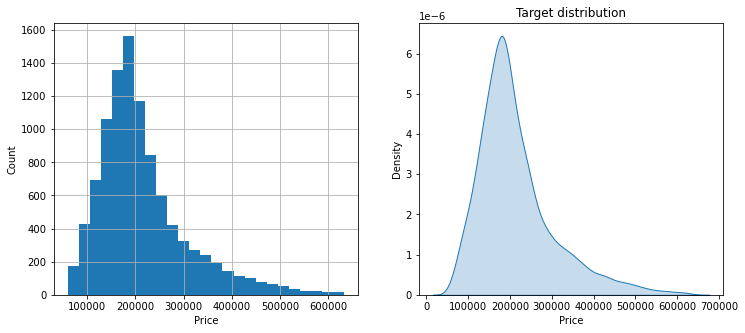

In [19]:
plt.figure(figsize = (12, 5))
plt.subplot(121)
train_df['Price'].hist(density=False, bins=25)
plt.ylabel('Count')
plt.xlabel('Price')

plt.subplot(122)
sns.kdeplot(train_df['Price'], shade=True, legend=False)
plt.xlabel('Price')
plt.title('Target distribution')

Log-normal distribution is OK

In [20]:
target_mean = round(train_df['Price'].mean(), 2)
target_median =train_df['Price'].median()
target_mode = train_df['Price'].mode()[0]
print(f"Mean = {target_mean}, Median = {target_median}, Mode = {target_mode}")

Mean = 214138.86, Median = 192269.64487934904, Mode = 59174.77802758122


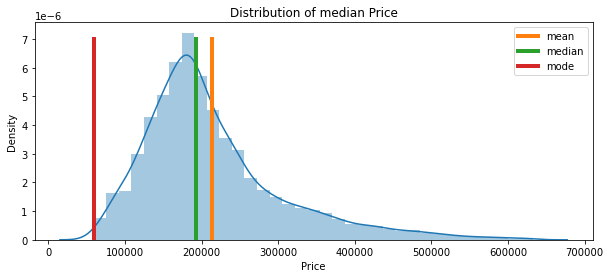

In [21]:
plt.figure(figsize = (10, 4))
sns.distplot(train_df['Price'], bins=35)
y=np.linspace(0, 0.000007, 10)
plt.plot([target_mean] * 10, y, label='mean', linewidth=4)
plt.plot([target_median] * 10, y, label='median', linewidth=4)
plt.plot([target_mode] * 10, y, label='mode', linewidth=4)

plt.title('Distribution of median Price')
plt.legend()

In [22]:
df_num_features = train_df.select_dtypes(include=["float64", "int64"])
df_num_features.drop('Price', axis=1, inplace=True)

In [23]:
df_num_features

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
0,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,11,3097,0,NaN,0,0
1,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,30,6207,1,1183.0,1,0
2,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,33,5261,0,240.0,3,1
3,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,1,264,0,NaN,0,1
4,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,33,8667,2,NaN,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,52,10311,6,NaN,1,9
9996,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,2,629,1,NaN,0,0
9997,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,20,4386,14,NaN,1,5
9998,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,47,8004,3,125.0,3,5


CHECK ROOMs

In [24]:
train_df[train_df['Rooms']==0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
2194,3159,88,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,B,B,43,8429,3,NaN,3,9,B,158998.110646
3780,7317,27,0.0,41.790881,NaN,0.0,13,0.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,98129.976788
5894,770,28,0.0,49.483501,NaN,0.0,16,0.0,2015,0.118537,B,B,30,6207,1,1183.0,1,0,B,217009.338463
6401,9443,27,0.0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,219281.918007
7644,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,NaN,0,1,B,302211.260887
7929,456,6,0.0,81.491446,NaN,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,212864.799112
9767,12638,27,0.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,B,B,11,3097,0,NaN,0,0,B,268394.744389
9869,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,126596.941798


In [25]:
train_df[train_df['Rooms'] >6]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
2004,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,NaN,5,15,B,317265.323792
2728,14865,9,10.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,B,B,25,5648,1,30.0,2,4,B,172329.270863
6088,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,NaN,0,1,B,78364.616704


In [26]:
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


## Searching NaN

In [27]:
train_df.isnull().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

## fill LifeSquare NaN with median

In [28]:
median=int(train_df['LifeSquare'].median())

In [29]:
train_df['LifeSquare'].fillna(median, inplace = True)

In [30]:
test_df['LifeSquare'].fillna(median, inplace = True)

In [31]:
train_df.isnull().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare          0
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [32]:
test_df.isnull().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare          0
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     2377
Helthcare_2         0
Shops_1             0
Shops_2             0
dtype: int64

In [33]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,1.890500,56.315775,36.100960,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,0.839512,21.058732,76.618154,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.774881,25.527399,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,2.000000,52.513310,32.000000,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,2.000000,65.900625,41.427234,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


## Looking for NaN using visualization
Поиск пропусков с помощью визуализации

<AxesSubplot:>

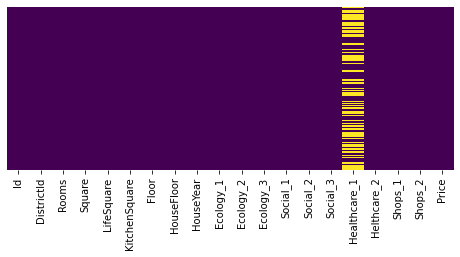

In [34]:
plt.figure(figsize=(8,3))
sns.heatmap(train_df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

Healthcare_1 NAN changing with median

In [35]:
mask = df_num_features['Healthcare_1'].fillna(df_num_features['Healthcare_1'].median(), inplace=True)

In [36]:
median=int(train_df['Healthcare_1'].median())

In [37]:
train_df.isnull().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare          0
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [38]:
test_df['Healthcare_1'].head()

0    1036.0
1       NaN
2       NaN
3       NaN
4     990.0
Name: Healthcare_1, dtype: float64

In [39]:
test_df.loc[test_df['Healthcare_1'].isnull(), 'Healthcare_1'] = test_df['Healthcare_1'].median()

In [40]:
median=int(test_df['Healthcare_1'].median())

In [41]:
test_df.isnull().sum()

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
dtype: int64

In [42]:
len(test_df) - test_df.count()

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
dtype: int64

In [43]:
cat_colnames = train_df.select_dtypes(include='object').columns.tolist()
cat_colnames

['Id', 'DistrictId', 'Ecology_2', 'Ecology_3', 'Shops_2']

In [44]:
for cat_colname in cat_colnames[2:]:
    print(str(cat_colname) + '\n\n' + str(train_df[cat_colname].value_counts()) + '\n' + '*' * 100 + '\n')

Ecology_2

B    9903
A      97
Name: Ecology_2, dtype: int64
****************************************************************************************************

Ecology_3

B    9725
A     275
Name: Ecology_3, dtype: int64
****************************************************************************************************

Shops_2

B    9175
A     825
Name: Shops_2, dtype: int64
****************************************************************************************************



## Checking correlation

array([[<AxesSubplot:title={'center':'Rooms'}>,
        <AxesSubplot:title={'center':'Square'}>,
        <AxesSubplot:title={'center':'LifeSquare'}>,
        <AxesSubplot:title={'center':'KitchenSquare'}>],
       [<AxesSubplot:title={'center':'Floor'}>,
        <AxesSubplot:title={'center':'HouseFloor'}>,
        <AxesSubplot:title={'center':'HouseYear'}>,
        <AxesSubplot:title={'center':'Ecology_1'}>],
       [<AxesSubplot:title={'center':'Social_1'}>,
        <AxesSubplot:title={'center':'Social_2'}>,
        <AxesSubplot:title={'center':'Social_3'}>,
        <AxesSubplot:title={'center':'Healthcare_1'}>],
       [<AxesSubplot:title={'center':'Helthcare_2'}>,
        <AxesSubplot:title={'center':'Shops_1'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

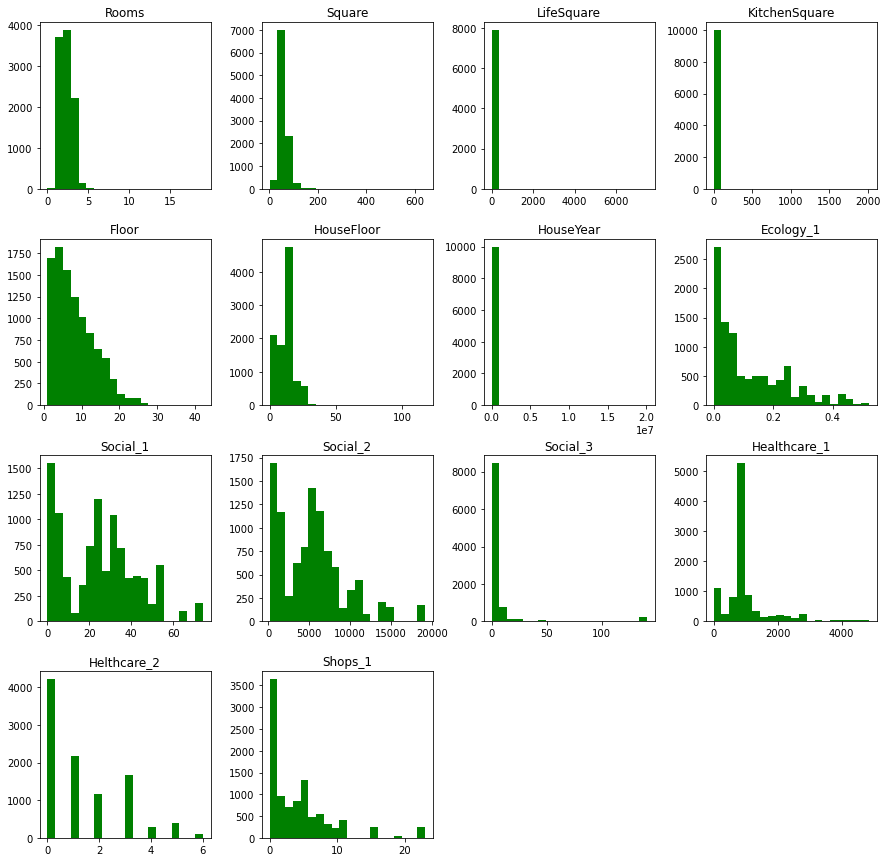

In [45]:
df_num_features.hist(figsize=(15,15), bins=20, grid=False, color='green')


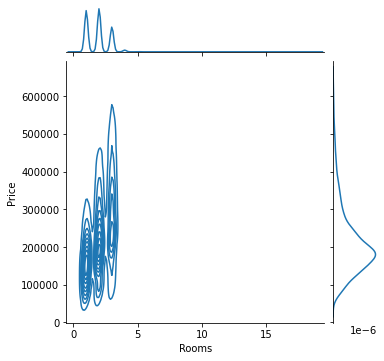

In [46]:
grid = sns.jointplot(train_df['Rooms'], train_df['Price'], kind='kde')
grid.fig.set_figwidth(5)
grid.fig.set_figheight(5)

we observe direct dependency of Price from qty of Rooms

Прямая зависимость количества комнат и цены на квартиру. 

## New Features Creation

### Eco2_Eco3

In [47]:
train_df["Ecology_2"]

0       B
1       B
2       B
3       B
4       B
       ..
9995    B
9996    B
9997    B
9998    B
9999    B
Name: Ecology_2, Length: 10000, dtype: object

In [48]:
train_df['Ecology_2_bin'] = train_df['Ecology_2'].replace({'A':0, 'B':1})
train_df['Ecology_3_bin'] = train_df['Ecology_3'].replace({'A':0, 'B':1})
train_df['Shops_2_bin'] = train_df['Shops_2'].replace({'A':0, 'B':1})

In [49]:
train_df.Ecology_2

0       B
1       B
2       B
3       B
4       B
       ..
9995    B
9996    B
9997    B
9998    B
9999    B
Name: Ecology_2, Length: 10000, dtype: object

In [50]:
test_df['Ecology_2_bin'] = test_df['Ecology_2'].replace({'A':0, 'B':1})
test_df['Ecology_3_bin'] = test_df['Ecology_3'].replace({'A':0, 'B':1})
test_df['Shops_2_bin'] = test_df['Shops_2'].replace({'A':0, 'B':1})

In [51]:
train_df.Ecology_3

0       B
1       B
2       B
3       B
4       B
       ..
9995    B
9996    B
9997    B
9998    B
9999    B
Name: Ecology_3, Length: 10000, dtype: object

In [52]:
train_df["Eco2_Eco3"] = train_df.Ecology_2 + train_df.Ecology_3
train_df.groupby(["Floor"])["Rooms"].mean()

Floor
1     1.855319
2     1.901361
3     1.897936
4     1.935722
5     1.873288
6     1.887781
7     1.936759
8     1.877138
9     1.890728
10    1.858951
11    1.846827
12    1.794521
13    1.871859
14    1.895028
15    1.912892
16    1.827586
17    1.937500
18    1.875676
19    1.925620
20    1.808824
21    1.779661
22    2.314815
23    1.960000
24    1.886792
25    2.235294
26    2.333333
27    2.000000
28    1.333333
31    1.000000
32    1.000000
33    1.000000
37    1.000000
42    2.000000
Name: Rooms, dtype: float64

In [53]:
test_df["Eco2_Eco3"] = test_df.Ecology_2 + test_df.Ecology_3
test_df.groupby(["Floor"])["Rooms"].mean()

Floor
1     1.897196
2     1.973384
3     1.830049
4     1.967495
5     2.006061
6     1.928395
7     1.858790
8     1.905199
9     1.966443
10    1.850187
11    1.812500
12    1.943396
13    1.921466
14    1.888268
15    1.761589
16    1.978102
17    1.875000
18    1.836957
19    1.764706
20    1.857143
21    1.885714
22    1.923077
23    2.030303
24    2.055556
25    1.736842
26    1.928571
27    1.750000
28    2.000000
31    2.000000
32    2.000000
33    2.000000
34    2.000000
38    2.000000
46    2.000000
78    2.000000
Name: Rooms, dtype: float64

In [54]:
gp = train_df.Ecology_2 + train_df.Ecology_3
gp.value_counts()

BB    9628
BA     275
AB      97
dtype: int64

In [55]:
gp = test_df.Ecology_2 + test_df.Ecology_3
gp.value_counts()

BB    4803
BA     149
AB      48
dtype: int64

In [56]:
district_size = train_df['DistrictId'].value_counts().reset_index()\
               .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})

# VC ~ размерность датасета

# VC(train + test)
# VC(normalize=True)
# VC(train).to_dict() -> train.map(dict), test.map(dict)
district_size.head()

,DistrictId,DistrictSize
0,27,851
1,1,652
2,23,565
3,6,511
4,9,294


In [57]:
train_df = train_df.merge(district_size, on='DistrictId', how='left')
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,Eco2_Eco3,DistrictSize
0,11809,27,3.0,115.027311,32.000000,10.0,4,10.0,2014,0.075424,...,NaN,0,0,B,305018.871089,1,1,1,BB,851
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,1183.0,1,0,B,177734.553407,1,1,1,BB,78
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,240.0,3,1,B,282078.720850,1,1,1,BB,652
3,2352,1,1.0,40.409907,32.000000,1.0,10,22.0,1977,0.007122,...,NaN,0,1,B,168106.007630,1,1,1,BB,652
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,NaN,0,6,B,343995.102962,1,1,1,BB,89


In [58]:
(train_df['DistrictSize'] > 100).value_counts()

True     5069
False    4931
Name: DistrictSize, dtype: int64

In [59]:
train_df['IsDistrictLarge'] = (train_df['DistrictSize'] > 100).astype(int)
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,Eco2_Eco3,DistrictSize,IsDistrictLarge
0,11809,27,3.0,115.027311,32.000000,10.0,4,10.0,2014,0.075424,...,0,0,B,305018.871089,1,1,1,BB,851,1
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,1,0,B,177734.553407,1,1,1,BB,78,0
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,3,1,B,282078.720850,1,1,1,BB,652,1
3,2352,1,1.0,40.409907,32.000000,1.0,10,22.0,1977,0.007122,...,0,1,B,168106.007630,1,1,1,BB,652,1
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,0,6,B,343995.102962,1,1,1,BB,89,0


In [60]:
train_df.groupby(["IsDistrictLarge"])["Price"].mean()

IsDistrictLarge
0    245930.782949
1    183212.444913
Name: Price, dtype: float64

In [61]:
district_size = test_df['DistrictId'].value_counts().reset_index()\
               .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})

In [62]:
test_df = test_df.merge(district_size, on='DistrictId', how='left')
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,Eco2_Eco3,DistrictSize
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,...,0,1036.0,1,1,B,1,1,1,BB,46
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,...,1,900.0,0,0,A,1,1,0,BB,122
2,960,27,2.0,59.463678,32.000000,9.0,19,19.0,1977,0.211401,...,0,900.0,0,1,B,1,1,1,BB,391
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,...,0,900.0,0,0,B,1,1,1,BB,264
4,746,74,1.0,53.837056,32.000000,1.0,8,17.0,1977,0.309479,...,4,990.0,0,6,B,1,1,1,BB,61


In [63]:
(test_df['DistrictSize'] > 100).value_counts()

False    3375
True     1625
Name: DistrictSize, dtype: int64

In [64]:
test_df['IsDistrictLarge'] = (test_df['DistrictSize'] > 100).astype(int)
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,Eco2_Eco3,DistrictSize,IsDistrictLarge
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,...,1036.0,1,1,B,1,1,1,BB,46,0
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,...,900.0,0,0,A,1,1,0,BB,122,1
2,960,27,2.0,59.463678,32.000000,9.0,19,19.0,1977,0.211401,...,900.0,0,1,B,1,1,1,BB,391,1
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,...,900.0,0,0,B,1,1,1,BB,264,1
4,746,74,1.0,53.837056,32.000000,1.0,8,17.0,1977,0.309479,...,990.0,0,6,B,1,1,1,BB,61,0


### MEDPRICEBYDISTRICT

In [65]:
med_price_by_district = train_df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                       .rename(columns={'Price':'MedPriceByDistrict'})

med_price_by_district.head()

,DistrictId,Rooms,MedPriceByDistrict
0,0,1.0,142799.434052
1,0,2.0,176210.812334
2,0,3.0,300610.359425
3,1,1.0,146735.671740
4,1,2.0,202706.090239


In [66]:
train_df = train_df.merge(med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Shops_1,Shops_2,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,Eco2_Eco3,DistrictSize,IsDistrictLarge,MedPriceByDistrict
0,11809,27,3.0,115.027311,32.000000,10.0,4,10.0,2014,0.075424,...,0,B,305018.871089,1,1,1,BB,851,1,213530.788443
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,0,B,177734.553407,1,1,1,BB,78,0,146032.829834
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,1,B,282078.720850,1,1,1,BB,652,1,244005.272380
3,2352,1,1.0,40.409907,32.000000,1.0,10,22.0,1977,0.007122,...,1,B,168106.007630,1,1,1,BB,652,1,146735.671740
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,6,B,343995.102962,1,1,1,BB,89,0,201584.441255


In [67]:
test_df['DistrictId'] = test_df['DistrictId'].astype(str)

In [68]:
test_df.merge(med_price_by_district, on=['DistrictId', 'Rooms'], how='left').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  5000 non-null   int64  
 1   DistrictId          5000 non-null   object 
 2   Rooms               5000 non-null   float64
 3   Square              5000 non-null   float64
 4   LifeSquare          5000 non-null   float64
 5   KitchenSquare       5000 non-null   float64
 6   Floor               5000 non-null   int64  
 7   HouseFloor          5000 non-null   float64
 8   HouseYear           5000 non-null   int64  
 9   Ecology_1           5000 non-null   float64
 10  Ecology_2           5000 non-null   object 
 11  Ecology_3           5000 non-null   object 
 12  Social_1            5000 non-null   int64  
 13  Social_2            5000 non-null   int64  
 14  Social_3            5000 non-null   int64  
 15  Healthcare_1        5000 non-null   float64
 16  Helthc

In [69]:
new_feature_names = ['med_price_by_district']

In [70]:
train_df.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'Ecology_2_bin',
 'Ecology_3_bin',
 'Shops_2_bin',
 'Eco2_Eco3',
 'DistrictSize',
 'IsDistrictLarge',
 'MedPriceByDistrict']

In [71]:
test_df.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Ecology_2_bin',
 'Ecology_3_bin',
 'Shops_2_bin',
 'Eco2_Eco3',
 'DistrictSize',
 'IsDistrictLarge']

In [72]:
feature_names=['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
                 'Ecology_1', 'Ecology_2_bin', 'Ecology_3_bin', 'Social_1', 'Social_2', 'Social_3',
                 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Shops_2_bin']
new_feature_names = ['IsDistrictLarge', 'MedPriceByDistrict']
target_name='Price'

## Checking Outliers using Boxplot visualization
ищем выбросы с помощью Boxplot

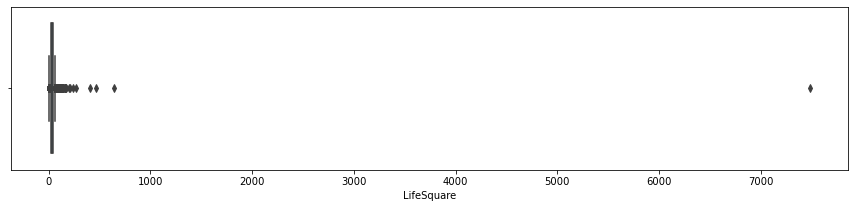

In [73]:
plt.figure(figsize=(15, 3))
sns.boxplot(train_df['LifeSquare'], whis=1.5)
plt.xlabel('LifeSquare')
plt.show()

In [74]:
train_df.loc[train_df['LifeSquare'] > 300, 'LifeSquare'] = train_df['LifeSquare'].median()

<AxesSubplot:>

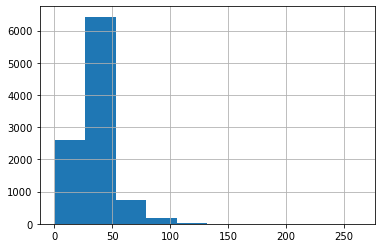

In [75]:
train_df['LifeSquare'].hist()

<AxesSubplot:>

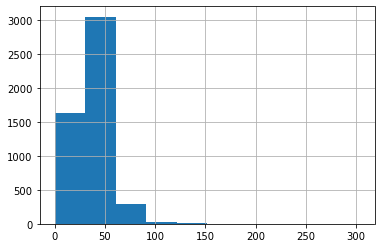

In [76]:
test_df['LifeSquare'].hist()

In [77]:
test_df.loc[train_df['LifeSquare'] > 300, 'LifeSquare'] = test_df['LifeSquare'].median()

In [78]:
train_df['LifeSquare'].describe()

count    10000.000000
mean        35.214674
std         16.080657
min          0.370619
25%         25.527399
50%         32.000000
75%         41.415441
max        263.542020
Name: LifeSquare, dtype: float64

In [79]:
test_df['LifeSquare'].describe()

count    5000.000000
mean       35.292946
std        15.950730
min         0.333490
25%        25.850152
50%        32.000000
75%        41.769526
max       303.071094
Name: LifeSquare, dtype: float64

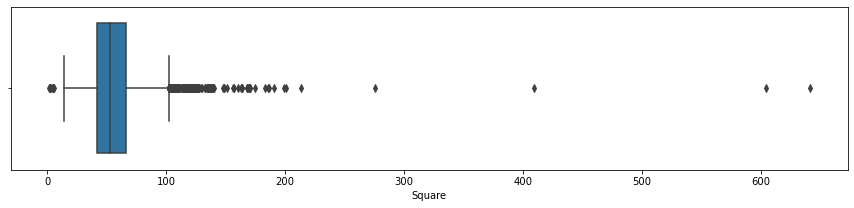

In [80]:
plt.figure(figsize=(15, 3))
sns.boxplot(train_df['Square'], whis=1.5)
plt.xlabel('Square')
plt.show()

In [81]:
train_df.loc[train_df['Square'] > 400, 'Square'] = train_df['Square'].median()

In [82]:
train_df.loc[train_df['Square'] <1, 'Square'] = train_df['Square'].median()

<AxesSubplot:>

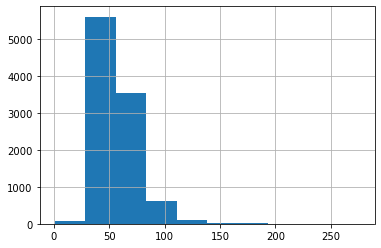

In [83]:
train_df['Square'].hist()

In [84]:
test_df.loc[train_df['Square'] > 400, 'Square'] = test_df['Square'].median()

In [85]:
test_df.loc[test_df['Square'] <1, 'Square'] = test_df['Square'].median()

<AxesSubplot:>

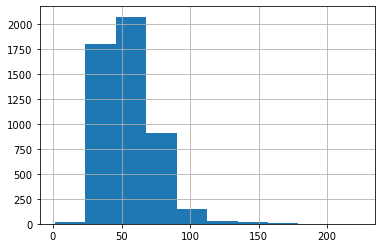

In [86]:
test_df['Square'].hist()

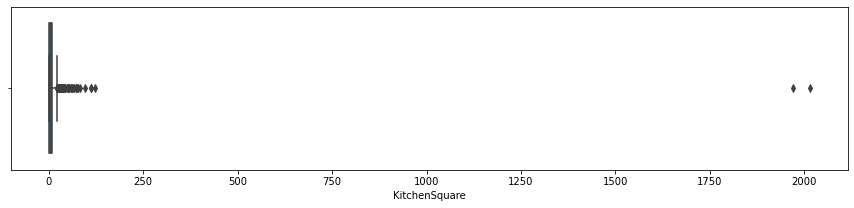

In [87]:
plt.figure(figsize=(15, 3))
sns.boxplot(train_df['KitchenSquare'], whis=1.5)
plt.xlabel('KitchenSquare')
plt.show()

In [88]:
train_df['KitchenSquare'].quantile(.975), train_df['KitchenSquare'].quantile(.025)

(13.0, 0.0)

In [89]:
condition = (train_df['KitchenSquare'].isna()) \
             | (train_df['KitchenSquare'] > train_df['KitchenSquare'].quantile(.975))
        
train_df.loc[condition, 'KitchenSquare'] = train_df['KitchenSquare'].median()

train_df.loc[train_df['KitchenSquare'] < 3, 'KitchenSquare'] = 3

In [90]:
train_df['KitchenSquare'].value_counts()

3.0     3183
8.0     1306
6.0     1227
5.0     1169
10.0    1075
9.0      843
7.0      609
12.0     249
11.0     233
13.0      67
4.0       39
Name: KitchenSquare, dtype: int64

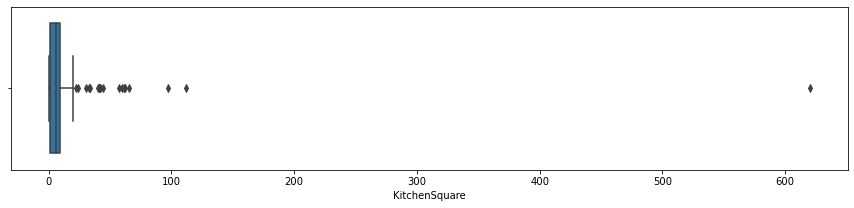

In [91]:
plt.figure(figsize=(15, 3))
sns.boxplot(test_df['KitchenSquare'], whis=1.5)
plt.xlabel('KitchenSquare')
plt.show()

In [92]:
test_df['KitchenSquare'].quantile(.975), test_df['KitchenSquare'].quantile(.025)

(12.0, 0.0)

In [93]:
condition = (test_df['KitchenSquare'].isna()) \
             | (test_df['KitchenSquare'] > test_df['KitchenSquare'].quantile(.975))
        
test_df.loc[condition, 'KitchenSquare'] = test_df['KitchenSquare'].median()

test_df.loc[train_df['KitchenSquare'] < 3, 'KitchenSquare'] = 3

In [94]:
test_df['KitchenSquare'].value_counts()

1.0     1191
6.0      709
5.0      612
8.0      606
10.0     558
9.0      417
0.0      335
7.0      297
12.0     132
11.0     107
4.0       21
3.0       11
2.0        4
Name: KitchenSquare, dtype: int64

<AxesSubplot:>

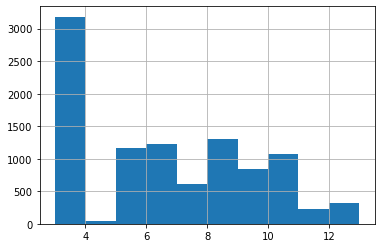

In [95]:
train_df['KitchenSquare'].hist()

<AxesSubplot:>

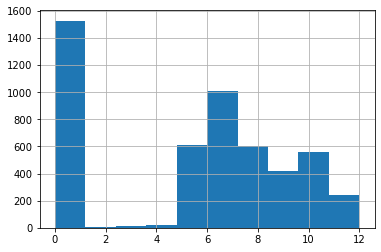

In [96]:
test_df['KitchenSquare'].hist()

In [97]:
train_df['HouseYear'].sort_values(ascending=False)

9163    20052011
8828        4968
7246        2020
2350        2020
8296        2020
          ...   
7610        1916
6250        1914
2066        1912
2795        1912
6794        1910
Name: HouseYear, Length: 10000, dtype: int64

In [98]:
train_df.loc[train_df['HouseYear'] > 2020, 'HouseYear'] = 2020

Text(0.5, 1.0, 'Distribution of variable House Year')

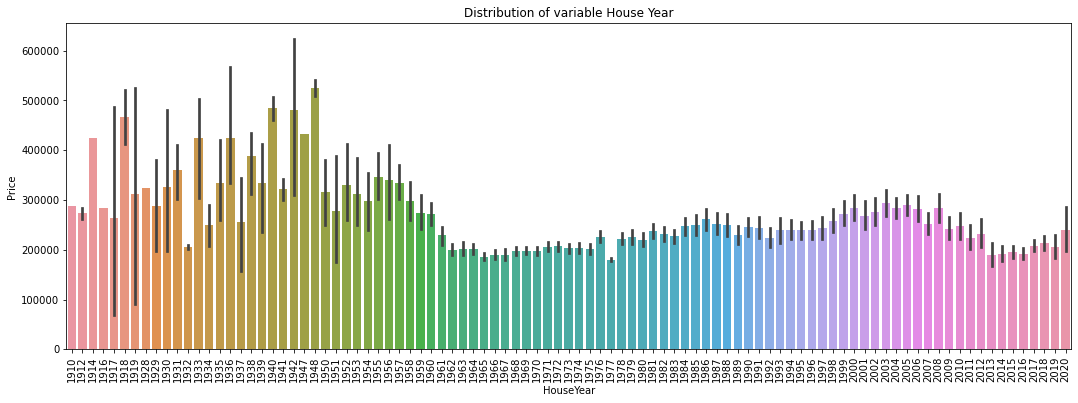

In [99]:
plt.figure(figsize=(18, 6))
sns.barplot(train_df['HouseYear'], train_df['Price'])
plt.xticks(rotation=90)
plt.title('Distribution of variable House Year')

In [100]:
test_df['HouseYear'].sort_values(ascending=False)

3959    2020
4628    2020
1661    2020
4416    2020
3016    2020
        ... 
4836    1912
4046    1911
2990    1910
3166    1909
1929    1908
Name: HouseYear, Length: 5000, dtype: int64

In [101]:
test_df.loc[train_df['HouseYear'] > 2020, 'HouseYear'] = 2020

Text(0.5, 1.0, 'Correlation Matrix')

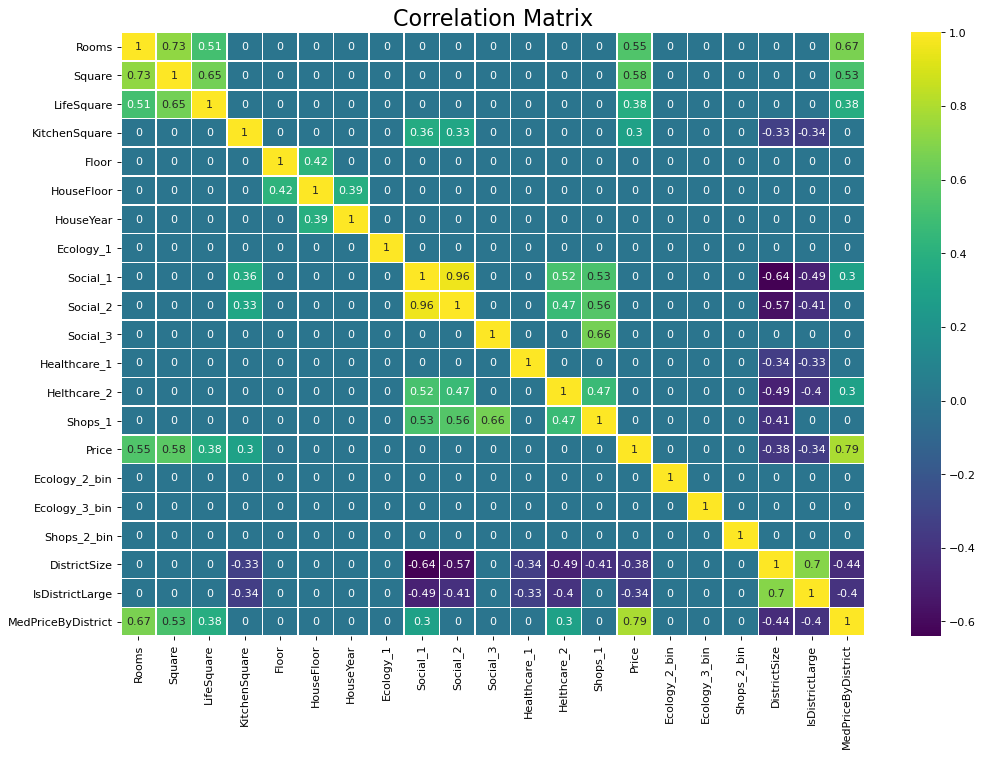

In [102]:
plt.figure(figsize=(15,10),dpi= 80)

corr_matrix=train_df.corr()
corr_matrix=np.round(corr_matrix,2)
corr_matrix[np.abs(corr_matrix)<0.3] = 0
sns.heatmap(corr_matrix, annot=True, linewidth=.5, cmap = 'viridis')
plt.title('Correlation Matrix', fontsize=20)

We can see that 
Rooms has very strong positive correlation with Square and Price

Social_1 with Social_2

Shops_1 with Social_3 and Social_2

Floor and HouseFloor

Lowest correlation HouseYear with DistrictID and Healthcare

Ecology is the least important.

In [103]:
mask = train_df["Square"] < train_df["KitchenSquare"] + train_df["LifeSquare"]
train_df.loc[mask].describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,...,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictSize,IsDistrictLarge,MedPriceByDistrict
count,1153.000000,1153.000000,1153.000000,1153.000000,1153.000000,1153.000000,1153.000000,1153.000000,1153.000000,1153.000000,...,398.000000,1153.000000,1153.000000,1153.000000,1153.0,1153.00000,1153.000000,1153.000000,1153.000000,1153.000000
mean,1.711188,57.047823,57.181982,4.970512,9.762359,13.900260,1998.547268,0.104508,14.752819,3429.692975,...,846.032663,0.812663,3.460538,190907.357845,1.0,0.99046,0.887251,417.732871,0.815265,186697.129112
std,0.804083,23.091808,24.003613,3.027793,5.934750,8.406736,19.890579,0.111263,16.310745,3796.026015,...,656.216314,1.327963,5.416543,95615.299871,0.0,0.09725,0.316423,296.582019,0.388251,72071.493531
min,0.000000,1.136859,0.873147,3.000000,1.000000,0.000000,1918.000000,0.000000,0.000000,168.000000,...,30.000000,0.000000,0.000000,59877.592523,1.0,0.00000,0.000000,4.000000,0.000000,84250.557673
25%,1.000000,40.907292,40.853732,3.000000,5.000000,9.000000,1977.000000,0.011654,2.000000,475.000000,...,540.000000,0.000000,0.000000,126626.328643,1.0,1.00000,1.000000,114.000000,1.000000,130636.710519
50%,2.000000,52.540107,52.731512,3.000000,9.000000,17.000000,2014.000000,0.072158,6.000000,1564.000000,...,705.000000,0.000000,1.000000,169528.896664,1.0,1.00000,1.000000,511.000000,1.000000,166809.665642
75%,2.000000,67.972296,67.791089,8.000000,14.000000,17.000000,2016.000000,0.195781,24.000000,5735.000000,...,1046.000000,1.000000,5.000000,226746.961769,1.0,1.00000,1.000000,652.000000,1.000000,213915.960440
max,5.000000,212.932361,263.542020,13.000000,28.000000,117.000000,2020.000000,0.486246,74.000000,19083.000000,...,4508.000000,6.000000,23.000000,621002.912679,1.0,1.00000,1.000000,851.000000,1.000000,595128.195352


In [104]:
train_df.loc[train_df['LifeSquare'] < 10, 'LifeSquare'] = 10

In [105]:
train_df.loc[train_df['KitchenSquare'] < 3, 'KitchenSquare'] = 3

In [106]:
train_df['Rooms_outlier'] = 0
train_df.loc[(train_df['Rooms'] == 0) | (train_df['Rooms'] >= 6), 'Rooms_outlier'] = 1
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Shops_2,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,Eco2_Eco3,DistrictSize,IsDistrictLarge,MedPriceByDistrict,Rooms_outlier
0,11809,27,3.0,115.027311,32.000000,10.0,4,10.0,2014,0.075424,...,B,305018.871089,1,1,1,BB,851,1,213530.788443,0
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,B,177734.553407,1,1,1,BB,78,0,146032.829834,0
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,B,282078.720850,1,1,1,BB,652,1,244005.272380,0
3,2352,1,1.0,40.409907,32.000000,3.0,10,22.0,1977,0.007122,...,B,168106.007630,1,1,1,BB,652,1,146735.671740,0
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,B,343995.102962,1,1,1,BB,89,0,201584.441255,0


In [107]:
train_df.loc[train_df['Rooms'] == 0, 'Rooms'] = 1
train_df.loc[train_df['Rooms'] >= 6, 'Rooms'] = train_df['Rooms'].median()

In [108]:
test_df['Rooms_outlier'] = 0
test_df.loc[(train_df['Rooms'] == 0) | (test_df['Rooms'] >= 6), 'Rooms_outlier'] = 1
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Shops_2,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,Eco2_Eco3,DistrictSize,IsDistrictLarge,Rooms_outlier
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,...,1,1,B,1,1,1,BB,46,0,0
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,...,0,0,A,1,1,0,BB,122,1,0
2,960,27,2.0,59.463678,32.000000,9.0,19,19.0,1977,0.211401,...,0,1,B,1,1,1,BB,391,1,0
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,...,0,0,B,1,1,1,BB,264,1,0
4,746,74,1.0,53.837056,32.000000,1.0,8,17.0,1977,0.309479,...,0,6,B,1,1,1,BB,61,0,0


In [109]:
test_df.loc[test_df['Rooms'] == 0, 'Rooms'] = 1
test_df.loc[test_df['Rooms'] >= 6, 'Rooms'] = test_df['Rooms'].median()

In [110]:
train_df['Rooms'].value_counts()

2.0    3884
1.0    3713
3.0    2235
4.0     150
5.0      18
Name: Rooms, dtype: int64

In [111]:
test_df['Rooms'].value_counts()

2.0    2033
1.0    1771
3.0    1099
4.0      90
5.0       7
Name: Rooms, dtype: int64

In [112]:
train_df.shape

(10000, 28)

In [113]:
test_df.shape

(5000, 26)

In [114]:
train_df['HouseFloor'].sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        36.,  37.,  38.,  39.,  40.,  44.,  45.,  47.,  48.,  99., 117.])

In [115]:
train_df['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 37, 42])

In [116]:
train_df.loc[train_df['HouseFloor'] == 0, 'HouseFloor'] = int(train_df['HouseFloor'].median())

In [117]:
np.random.seed(27)
floor_outliers = train_df[train_df['Floor'] > train_df['HouseFloor']].index
print(len(floor_outliers))

train_df.loc[floor_outliers, 'Floor'] = train_df.loc[floor_outliers, 'HouseFloor'].apply(
    lambda x: random.randint(1, x)
)

1610


In [118]:
len(train_df) - train_df.count()

Id                       0
DistrictId               0
Rooms                    0
Square                   0
LifeSquare               0
KitchenSquare            0
Floor                    0
HouseFloor               0
HouseYear                0
Ecology_1                0
Ecology_2                0
Ecology_3                0
Social_1                 0
Social_2                 0
Social_3                 0
Healthcare_1          4798
Helthcare_2              0
Shops_1                  0
Shops_2                  0
Price                    0
Ecology_2_bin            0
Ecology_3_bin            0
Shops_2_bin              0
Eco2_Eco3                0
DistrictSize             0
IsDistrictLarge          0
MedPriceByDistrict       0
Rooms_outlier            0
dtype: int64

In [119]:
train_df['Healthcare_1'].head()

0       NaN
1    1183.0
2     240.0
3       NaN
4       NaN
Name: Healthcare_1, dtype: float64

In [120]:
train_df.loc[train_df['Healthcare_1'].isnull(), 'Healthcare_1'] = train_df['Healthcare_1'].median()

## Dividing to train & test

In [121]:
train_df["Rooms_vc"] = train_df["Rooms"].map(train_df["Rooms"].value_counts().to_dict())
train_df["Rooms_vc"]

0       2235
1       3713
2       2235
3       3713
4       3884
        ... 
9995    3884
9996    3884
9997    3713
9998    3713
9999    3713
Name: Rooms_vc, Length: 10000, dtype: int64

In [122]:
X = train_df[feature_names+new_feature_names]
y = train_df[target_name]

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=21)

## Model Creation

In [124]:
rf_model = RandomForestRegressor(
    max_depth=8, min_samples_split=100, n_estimators=500, n_jobs=-1, random_state=39
)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, min_samples_split=100, n_estimators=500,
                      n_jobs=-1, random_state=39)

Train R2:	0.769
Test R2:	0.715


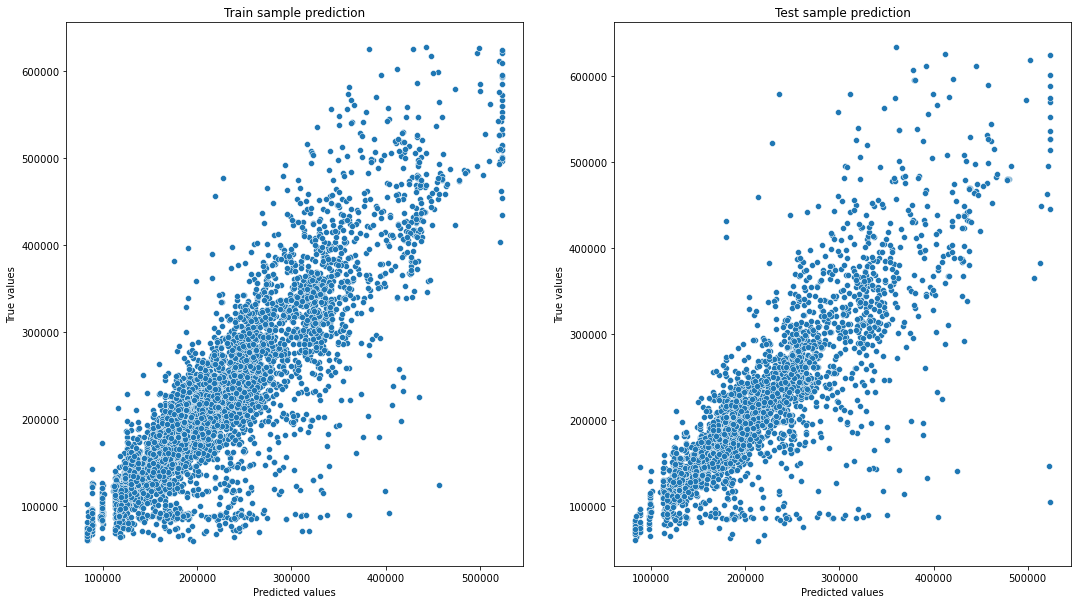

In [125]:
y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_test)

evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

In [126]:
cv_score = cross_val_score(
    rf_model,
    X.fillna(-9999),
    y, scoring='r2',
    cv=KFold(n_splits=5, shuffle=True, random_state=21)
)
cv_score

array([0.72252425, 0.71541948, 0.70893903, 0.7256129 , 0.7547277 ])

In [127]:
feature_importances = pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
18,MedPriceByDistrict,0.812694
1,Square,0.110542
12,Social_3,0.017344
5,HouseFloor,0.009015
11,Social_2,0.006887
3,KitchenSquare,0.006769
10,Social_1,0.006509
2,LifeSquare,0.005817
13,Healthcare_1,0.004927
6,HouseYear,0.004776


MEDPriceDistrict took all the importance. 

In [128]:
test_id = test_df["Id"]
pred_df = pd.DataFrame()
pred_df["Id"] = test_id
pred_df["Price"] = np.random.randint(0, 1e6, size=test_id.shape[0])
assert pred_df.shape[0] == 5000, f"Real pred-shape = {pred_df.shape[0]}, Expected pred-shape = 5000"

pred_df.to_csv("./predictions_.csv", index=False)

In [129]:
pred_df = pd.read_csv("./predictions_.csv")
pred_df.head(n=2)

,Id,Price
0,4567,791571
1,5925,380600


In [130]:
test_df.shape[0]

5000

## GradientBoostingRegressor

In [131]:
%%time

model=GradientBoostingRegressor(learning_rate=0.02, max_depth=5, max_features=0.5, n_estimators=700, random_state=24 )
model.fit(X_train, y_train)
pred=model.predict(X_test)

CPU times: user 6.41 s, sys: 27.9 ms, total: 6.43 s
Wall time: 6.53 s


In [132]:
model.score(X_train,y_train)

0.8883285689649164

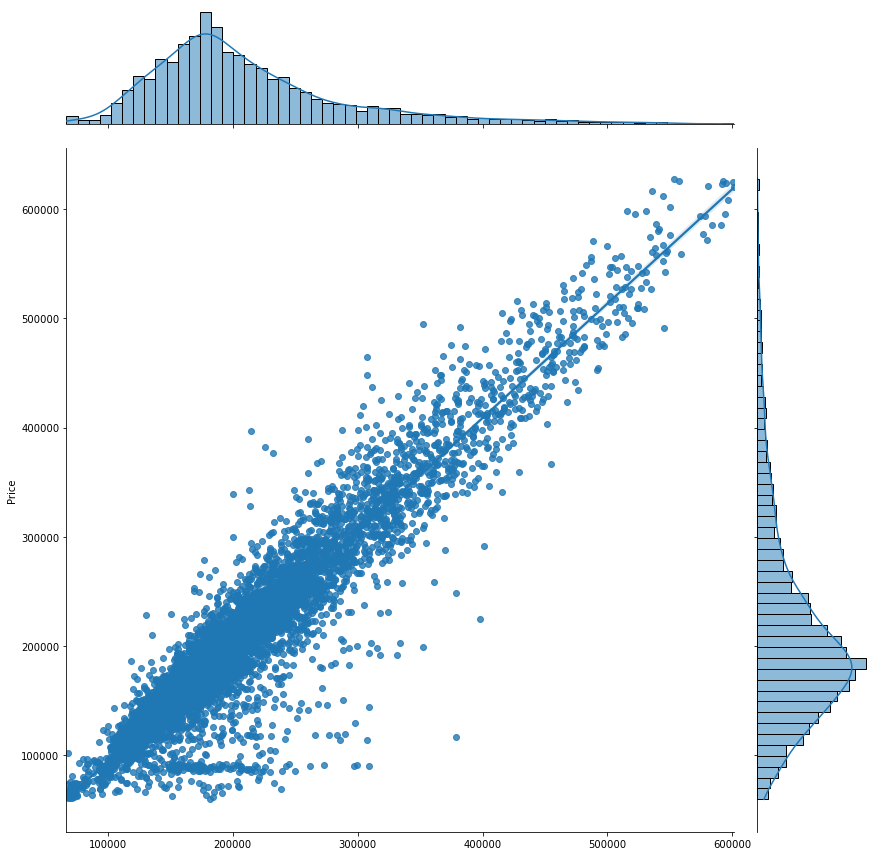

In [133]:
sns.jointplot(x=model.predict(X_train), y=y_train, kind='reg', height=12)
plt.show()

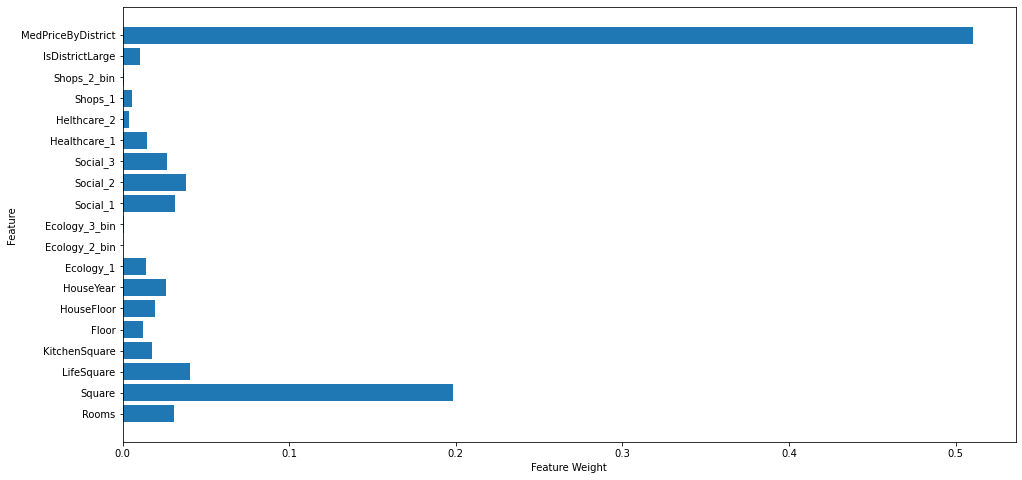

In [134]:
plt.figure(figsize=(16,8))
plt.barh(X_train.columns.tolist(), model.feature_importances_)
plt.xlabel('Feature Weight')
plt.ylabel('Feature')
plt.show()